In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# importing necessary modules
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [25]:
# reading the dataset
data = pd.read_csv("/content/drive/MyDrive/Fake News Data/Dataset/Final_Processed.csv")

In [ ]:
data.head

<bound method NDFrame.head of        Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0             0               0                 0   
1               1             1               1                 1   
2               2             2               2                 2   
3               3             3               3                 3   
4               4             4               4                 4   
...           ...           ...             ...               ...   
14400       14400         14610           14610              2965   
14401       14401         14611           14611              2966   
14402       14402         14612           14612              2967   
14403       14403         14613           14613              2968   
14404       14404         14614           14614              2969   

                   author                                          statement  \
0          Louis Jacobson  “We created more new jobs in two y

In [ ]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
dataset = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['content'][i])
    review = review.lower()
    review = review.split()
    
    review = ' '.join(review)
    dataset.append(review)

In [ ]:
X = tfidf_v.fit_transform(dataset).toarray()
y = data['BinaryNumTarget']

In [ ]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier(max_iter=1000)

In [26]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
# testing passive aggressive classifier
PAC.fit(X_train, y_train)

pred = PAC.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9566


In [ ]:
# saving model
import pickle
pickle.dump(PAC, open('/content/drive/MyDrive/Fake News Data/Models/PAC.pkl', 'wb'))

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

pred = logisticRegr.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9226


In [ ]:
pickle.dump(logisticRegr, open('/content/drive/MyDrive/Fake News Data/Models/logisticRegr.pkl', 'wb'))

# **Support Vector Machine**

In [ ]:
from sklearn import svm
supportVectorMachine = svm.SVC()
supportVectorMachine.fit(X_train, y_train)

pred = supportVectorMachine.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9511


In [ ]:
pickle.dump(supportVectorMachine, open('/content/drive/MyDrive/Fake News Data/Models/supportVectorMachine.pkl', 'wb'))

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

pred = decisionTree.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9726


In [ ]:
pickle.dump(decisionTree, open('/content/drive/MyDrive/Fake News Data/Models/decisionTree.pkl', 'wb'))

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
RF_pred_value = randomForest.predict(X_test)

RF_pred = []
for i in range(len(RF_pred_value)):
    if RF_pred_value[i].item() >= 0.5:
        RF_pred.append(1)
    else:
        RF_pred.append(0)

In [ ]:
score = metrics.accuracy_score(y_test, RF_pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9771


In [ ]:
pickle.dump(randomForest, open('/content/drive/MyDrive/Fake News Data/Models/randomForest.pkl', 'wb'))

# **LSTM**

In [38]:
import gensim

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
y = data["BinaryNumTarget"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
regexTokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["content"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = regexTokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

In [9]:
import pickle

In [30]:
w2v_model = pickle.load(open('/content/drive/MyDrive/Fake News Data/w2v.pkl', 'rb'))

In [42]:
#vocab size
len(w2v_model.wv.vocab)

51348

In [32]:
w2v_tokeizer = pickle.load(open('/content/drive/MyDrive/Fake News Data/w2v_tokenizer.pkl', 'rb'))

In [44]:
#Lets check few word to numerical reprsentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = w2v_tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break   

said -> 1
post -> 2
facebook -> 3
state -> 4
news -> 5
claim -> 6
people -> 7
covid -> 8
january -> 9
trump -> 10


In [45]:
len(y)

14405

In [46]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 1000])

14346

In [47]:
#Lets keep all news to 1000, add padding to news with less than 700 words and truncating long ones
maxlen = 1000

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [48]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(w2v_tokenizer.word_index) + 1

In [49]:
vocab_size

51349

In [50]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix 

In [51]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

<ipython-input-50-d09926a7d69d>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  weight_matrix[i] = model[word]


In [52]:
#Defining Neural Network
RNN = Sequential()
#Non-trainable embeddidng layer
RNN.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
RNN.add(Bidirectional(LSTM(units = 128)))
RNN.add(Dense(128,activation= 'relu'))
RNN.add(Dense(1, activation='sigmoid'))
RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [53]:
RNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 200)         10269800  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,639,721
Trainable params: 369,921
Non-trainable params: 10,269,800
_________________________________________________________________


In [54]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [55]:
history = RNN.fit(X_train, y_train, validation_split=0.3, epochs=2)

Epoch 1/2
237/237 [==============================] - 956s 4s/step - loss: 0.1525 - acc: 0.9471 - val_loss: 0.0990 - val_acc: 0.9772
Epoch 2/2
237/237 [==============================] - 948s 4s/step - loss: 0.0900 - acc: 0.9762 - val_loss: 0.0865 - val_acc: 0.9778


In [56]:
pickle.dump(RNN, open('/content/drive/MyDrive/Fake News Data/Models/LSTM.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......embedding
.........vars
............0
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.....

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


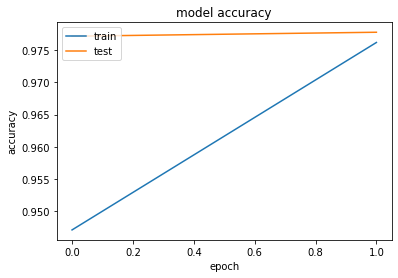

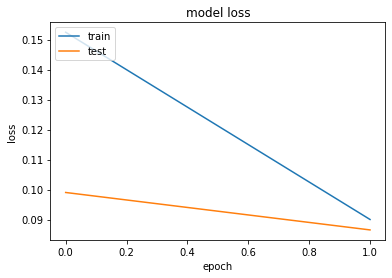

In [57]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
y_pred = (RNN.predict(X_test) >= 0.5).astype("int")

113/113 [==============================] - 150s 1s/step


In [60]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9792


In [65]:
# import necessary libraries
from sklearn.metrics import f1_score, precision_score, recall_score

# precision
print("Precision: %0.4f" % precision_score(y_test, y_pred))

# recall
print("Recall: %0.4f" % recall_score(y_test, y_pred))


# f1_score
print("f1 score: %0.4f" % f1_score(y_test, y_pred))

Precision: 0.9546
Recall: 0.9399
f1 score: 0.9472


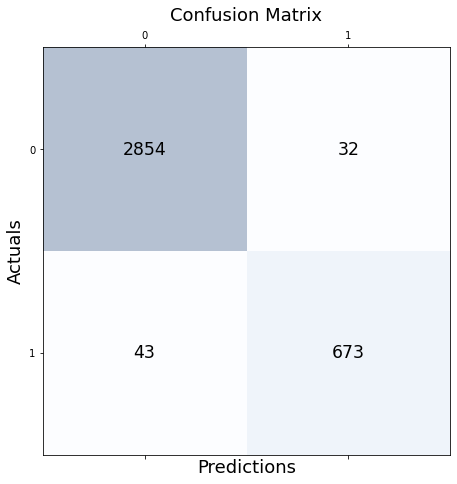

In [66]:
# import necessary libraries
from sklearn.metrics import confusion_matrix

#confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()